In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values are present in the dataset. Age has 177 null value, Cabin has 687 null values and Embarked has 2 null values.

<AxesSubplot:>

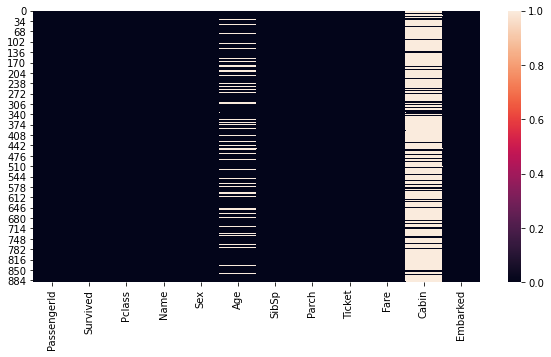

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

The dataset has null values in the Age and Cabin Columns. Huge number of values are missing in Cabin column, so will drop cabin column.

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The dataset consist of integer,float and object data types.

Integer - PassengerId,Survived,Pclass,SibSp,Parch

Float - Age,Fare

Object - Name,Sex,Ticket,Cabin,Embarked 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data set has 891 rows and 12 columns

The columns PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket and Fare has 891 non null values. But in Age only 714 non-values, Cabin only 204 non-values and Embarked only 889 non- values.

Null values are present in Age,Cabin and Embarked

In [7]:
#Statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count in Age does not match with others, So missing data present in Age.

The mean is greater than median in Fare and There is a huge difference between 75th percentile and MAX in Fare, So outlier will be there.



In [8]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Skewness is present in SibSp, Parch and Fare. SO need to remove skewness.

In [9]:
#removing skewness using squre root
df['SibSp']=np.sqrt(df['SibSp'])
df['Parch']=np.sqrt(df['Parch'])
df['Fare']=np.sqrt(df['Fare'])
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          1.436526
Parch          1.529799
Fare           2.085004
dtype: float64

The skewness good enough.

In [10]:
#Dropping the Cabin colum and PassengerId
df=df.drop(["Cabin","PassengerId","Name"],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1.0,0.000000,A/5 21171,2.692582,S
1,1,1,female,38.0,1.0,0.000000,PC 17599,8.442944,C
2,1,3,female,26.0,0.0,0.000000,STON/O2. 3101282,2.815138,S
3,1,1,female,35.0,1.0,0.000000,113803,7.286975,S
4,0,3,male,35.0,0.0,0.000000,373450,2.837252,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0.0,0.000000,211536,3.605551,S
887,1,1,female,19.0,0.0,0.000000,112053,5.477226,S
888,0,3,female,NaN,1.0,1.414214,W./C. 6607,4.842520,S
889,1,1,male,26.0,0.0,0.000000,111369,5.477226,C


<AxesSubplot:>

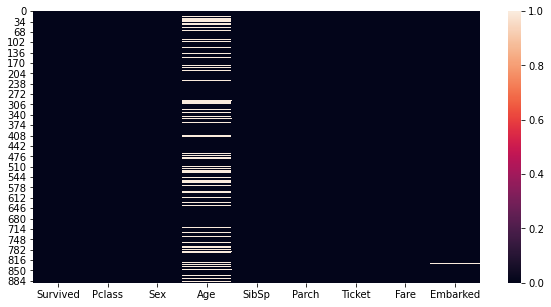

In [11]:
#Checking the null values again
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

Still missing values in Age, need to take care of Age.

In [12]:
#Checking which one is most frequently occuring in Embarked
df['Embarked'].mode()

0    S
dtype: object

In [13]:
#replacing the null values of Age using mean and in Embarked using mode.
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
#Age is a float datatype changing to integer
df['Age']=df['Age'].astype(int)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

There is no null value in the dataset.

<AxesSubplot:>

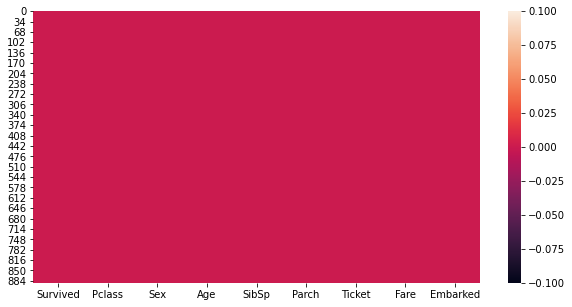

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [16]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.385286,0.293409,4.851220
std,0.486592,0.836071,13.013778,0.612359,0.543909,2.946119
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,2.812542
50%,0.000000,3.000000,29.000000,0.000000,0.000000,3.801868
75%,1.000000,3.000000,35.000000,1.000000,0.000000,5.567764
max,1.000000,3.000000,80.000000,2.828427,2.449490,22.634690


The count of all columns are equal. 

The 75th percentile and MAX has a difference , So there will be outliers.

In [17]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.067809,0.043535,0.121652,0.312508
Pclass,-0.338481,1.000000,-0.335071,0.006049,-0.006792,-0.660850
Age,-0.067809,-0.335071,1.000000,-0.216037,-0.234555,0.111814
SibSp,0.043535,0.006049,-0.216037,1.000000,0.473591,0.309346
Parch,0.121652,-0.006792,-0.234555,0.473591,1.000000,0.320344
Fare,0.312508,-0.660850,0.111814,0.309346,0.320344,1.000000


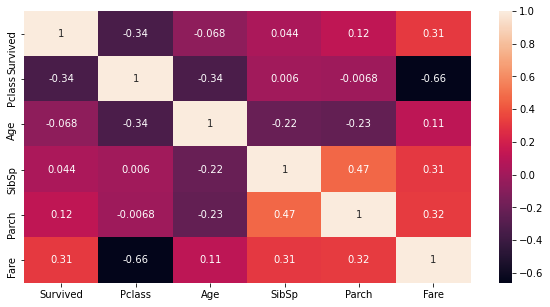

In [18]:
plt.figure(figsize=(10,5))
ax=sns.heatmap(df.corr(),annot=True)

The target variable Survived is positively correlated to SibSp,Parch and Fare. Negatively correlated to Pclass and Age.

Data Visualization

0    549
1    342
Name: Survived, dtype: int64

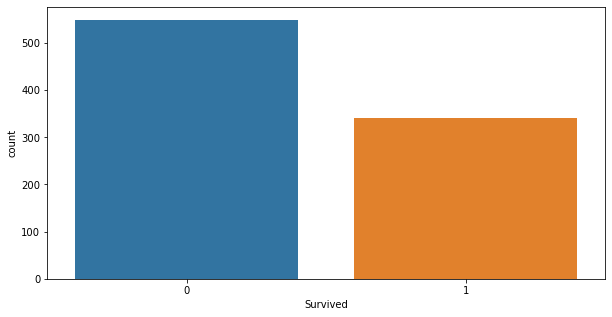

In [19]:
#Using count plot finding out how many people survived and not survived
plt.figure(figsize=(10,5))
sns.countplot(df['Survived'])
df['Survived'].value_counts()

In total 891 people, 549 -Not survived, 342 - Survived.

male      577
female    314
Name: Sex, dtype: int64

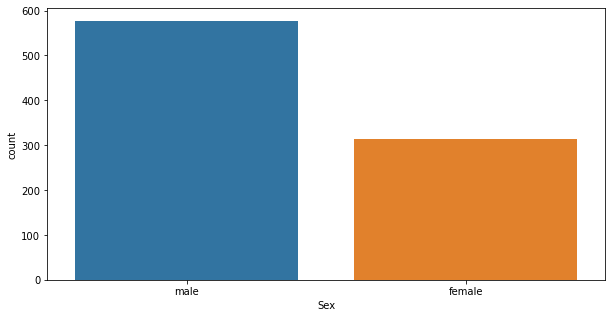

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
df['Sex'].value_counts()

In the dataset there were Male - 577, Female - 314

3    491
1    216
2    184
Name: Pclass, dtype: int64

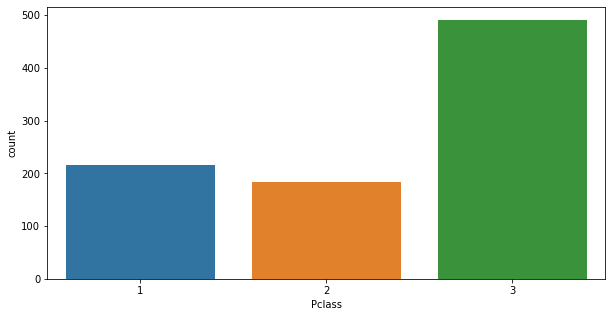

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['Pclass'])
df['Pclass'].value_counts()

The Pclass 3 has 491 people, Pclass 1 has 216 people and Pclass 2 has 184 people.

<AxesSubplot:xlabel='Age', ylabel='Density'>

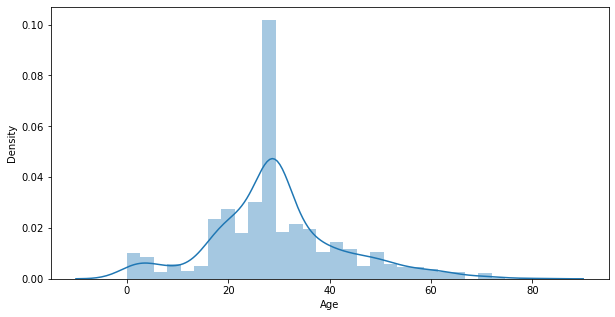

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])

Distribution of Age is normally distributed.

<AxesSubplot:xlabel='Age'>

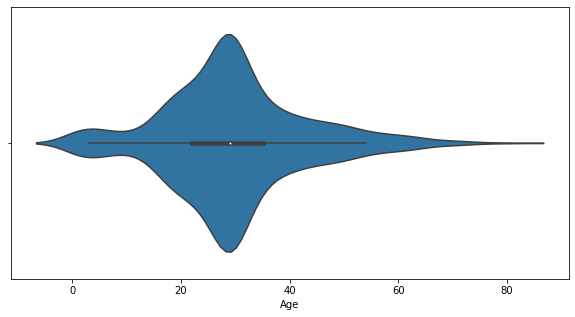

In [23]:
plt.figure(figsize=(10,5))
sns.violinplot(df['Age'])


Majority of the people age is between 20 and 40. Minority people between 60 and 80.

0.000000    608
1.000000    209
1.414214     28
2.000000     18
1.732051     16
2.828427      7
2.236068      5
Name: SibSp, dtype: int64

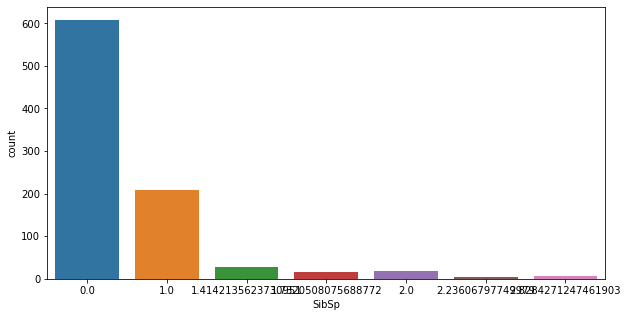

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df['SibSp'])
df['SibSp'].value_counts()

This chart shows how many siblings/spouse they had.

0.000000    678
1.000000    118
1.414214     80
2.236068      5
1.732051      5
2.000000      4
2.449490      1
Name: Parch, dtype: int64

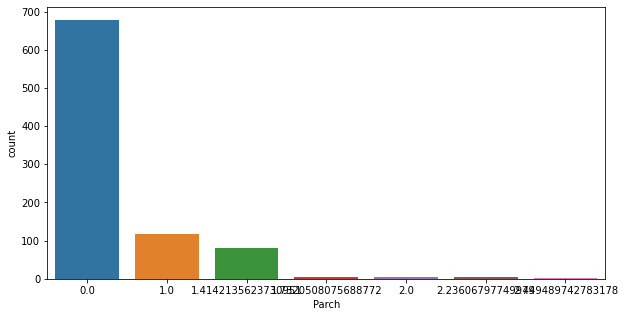

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['Parch'])
df['Parch'].value_counts()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

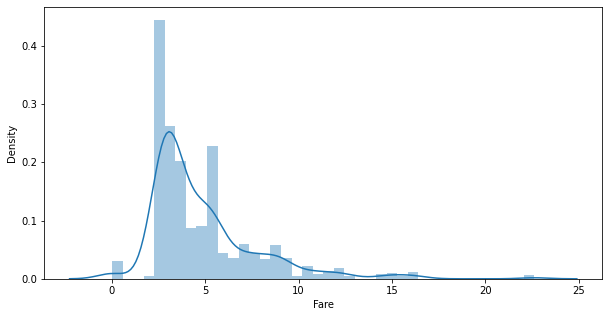

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df['Fare'])

S    646
C    168
Q     77
Name: Embarked, dtype: int64

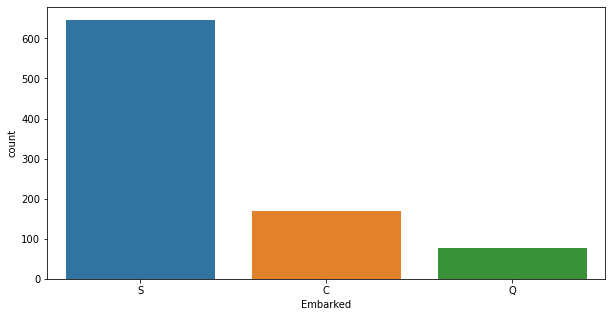

In [27]:
#Embarked is the dataset is the boarding place of the traveler.
plt.figure(figsize=(10,5))
sns.countplot(df['Embarked'])
df['Embarked'].value_counts()

646 people boarded in S, 168 people boarded in C and 77 people boarded in Q.

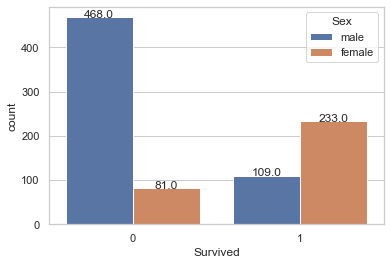

In [28]:
sns.set(style='whitegrid')
ax=sns.countplot(x='Survived',hue='Sex',data=df)
for i in ax.patches:
   ax.annotate( '{:.1f}'.format(i.get_height()),(i.get_x()+0.20, i.get_height()+0.01),ha='center')

468-Male & 81-Female not survived. 109-male & 233-Female survived.

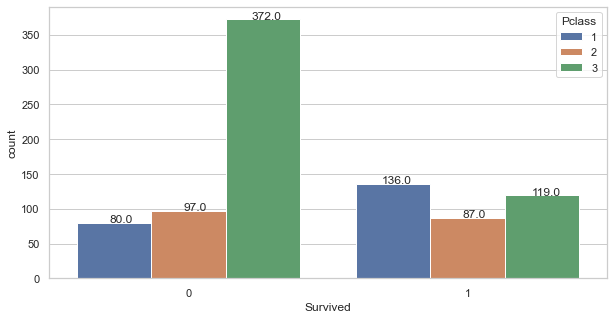

In [29]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax=sns.countplot(x='Survived',hue='Pclass',data=df)
for i in ax.patches:
   ax.annotate( '{:.1f}'.format(i.get_height()),(i.get_x()+0.20, i.get_height()+0.01),ha='right')

136 people from class1,87 people from class2 and 119 people from class3 survived.

80 people from class1,97 people from class2 and 372 people from class3 not survived.

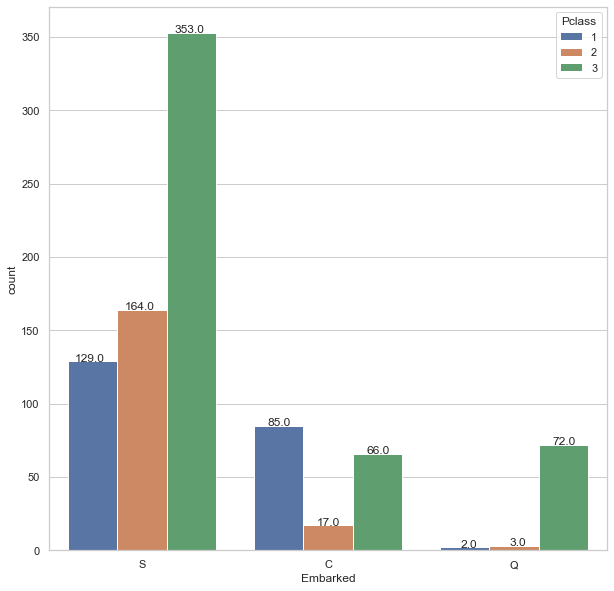

In [30]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
ax=sns.countplot(x='Embarked',hue='Pclass',data=df)
for i in ax.patches:
   ax.annotate( '{:.1f}'.format(i.get_height()),(i.get_x()+0.20, i.get_height()+0.02),ha='right')

129 people in class1,164 people in class2,353 people in class3, they are boarded from S.

85 people in class1,17 people in class2,66 people in class3, they are boarded from C.

2 people in class1,3 people in class2,72 people in class3, they are boarded from Q.

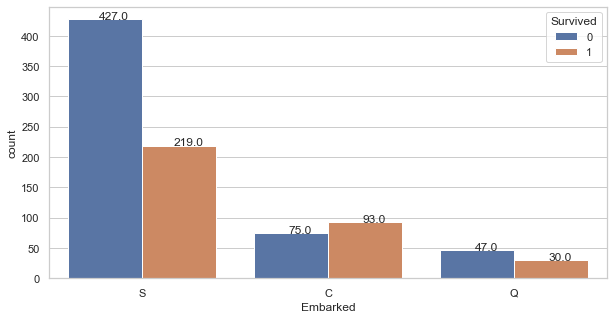

In [31]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax=sns.countplot(x='Embarked',hue='Survived',data=df)
for i in ax.patches:
   ax.annotate( '{:.1f}'.format(i.get_height()),(i.get_x()+0.25, i.get_height()+0.01),ha='center')

From the people boarded from S 219 of them survived, 427 of them not survived.

From the people boarded from C 93 of them survived, 75 of them not survived.

From the people boarded form Q 30 of them survived, 47 of them not survived.

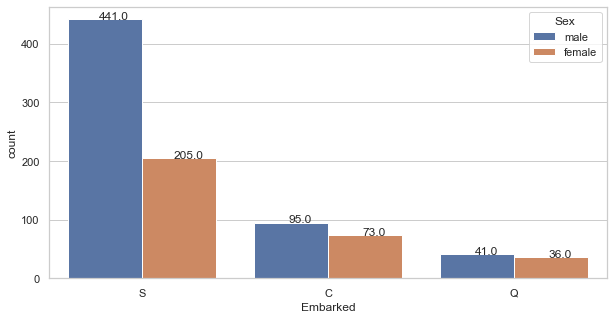

In [32]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax=sns.countplot(x='Embarked',hue='Sex',data=df)
for i in ax.patches:
   ax.annotate( '{:.1f}'.format(i.get_height()),(i.get_x()+0.25, i.get_height()+0.01),ha='center')

441 Male & 205 Female boarded from S

95 Male & 73 Female boarded from C

41 Male & 36 Female boarded from Q

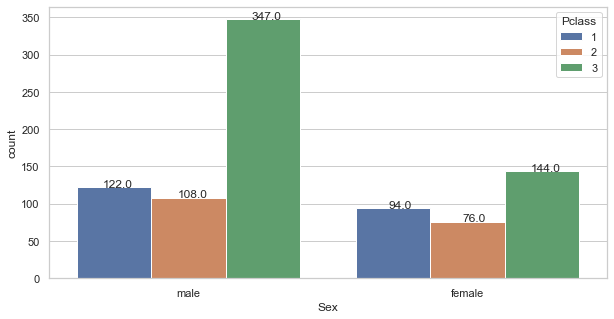

In [33]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
ax=sns.countplot(x='Sex',hue='Pclass',data=df)
for i in ax.patches:
   ax.annotate( '{:.1f}'.format(i.get_height()),(i.get_x()+0.20, i.get_height()+0.01),ha='right')

The 1st class has 122 male and 94 female.

The 2nd class has 108 male and 76 female.

The 3rd class has 347 male and 144 female.

Checking outliers

In [34]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22,1.0,0.000000,A/5 21171,2.692582,S
1,1,1,female,38,1.0,0.000000,PC 17599,8.442944,C
2,1,3,female,26,0.0,0.000000,STON/O2. 3101282,2.815138,S
3,1,1,female,35,1.0,0.000000,113803,7.286975,S
4,0,3,male,35,0.0,0.000000,373450,2.837252,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0.0,0.000000,211536,3.605551,S
887,1,1,female,19,0.0,0.000000,112053,5.477226,S
888,0,3,female,29,1.0,1.414214,W./C. 6607,4.842520,S
889,1,1,male,26,0.0,0.000000,111369,5.477226,C


In [35]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp       float64
Parch       float64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [36]:
#Using label encoder encoding the Sex column
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df['Pclass']=LE.fit_transform(df['Pclass'])
df['Sex']=LE.fit_transform(df['Sex'])
df['Age']=LE.fit_transform(df['Age'])
df['Ticket']=LE.fit_transform(df['Ticket'])
df['Embarked']=LE.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,1,22,1.0,0.000000,523,2.692582,2
1,1,0,0,38,1.0,0.000000,596,8.442944,0
2,1,2,0,26,0.0,0.000000,669,2.815138,2
3,1,0,0,35,1.0,0.000000,49,7.286975,2
4,0,2,1,35,0.0,0.000000,472,2.837252,2
...,...,...,...,...,...,...,...,...,...
886,0,1,1,27,0.0,0.000000,101,3.605551,2
887,1,0,0,19,0.0,0.000000,14,5.477226,2
888,0,2,0,29,1.0,1.414214,675,4.842520,2
889,1,0,1,26,0.0,0.000000,8,5.477226,0


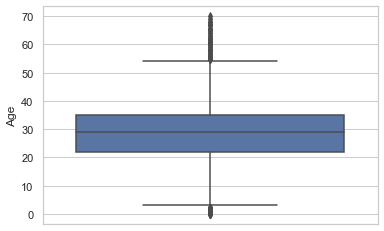

In [37]:
ax=sns.boxplot(y=df['Age'])

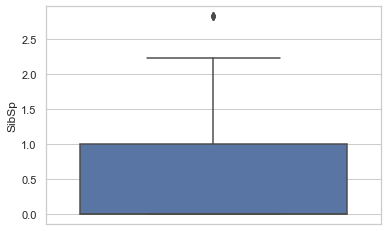

In [38]:
ax=sns.boxplot(y=df['SibSp'])

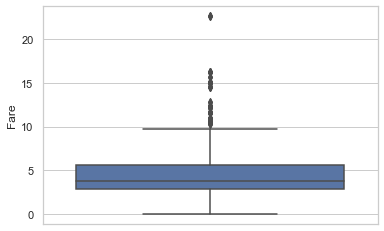

In [39]:
ax=sns.boxplot(y=df['Fare'])

In [40]:
#Finding out outliers
from scipy.stats import zscore

score=np.abs(zscore(df))
print(np.where(score>3))

(array([ 13,  25,  27,  59,  71,  88, 118, 159, 167, 180, 201, 258, 299,
       311, 324, 341, 360, 377, 380, 386, 438, 438, 480, 527, 557, 567,
       610, 630, 638, 678, 679, 683, 689, 700, 716, 730, 737, 742, 779,
       792, 846, 851, 863, 885], dtype=int64), array([5, 5, 7, 4, 4, 7, 7, 4, 5, 4, 4, 7, 7, 7, 4, 7, 5, 7, 7, 4, 5, 7,
       4, 7, 7, 5, 5, 3, 5, 5, 7, 4, 7, 7, 7, 7, 7, 7, 7, 4, 4, 3, 4, 5],
      dtype=int64))


In [41]:
#Removing outliers
dfnew=df[(score<3).all(axis=1)]
print('dfnew.shape = ',dfnew.shape)
df=dfnew

dfnew.shape =  (848, 9)


In [42]:
data_loss=(891-848)/891*100
data_loss

4.8260381593714925

4.82 % Data loss after outliers removed.

In [43]:
#Separating the dependent and independent variables.

X=df.drop('Survived',axis=1)
Y=df['Survived']

In [44]:
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,22,1.0,0.000000,523,2.692582,2
1,0,0,38,1.0,0.000000,596,8.442944,0
2,2,0,26,0.0,0.000000,669,2.815138,2
3,0,0,35,1.0,0.000000,49,7.286975,2
4,2,1,35,0.0,0.000000,472,2.837252,2
...,...,...,...,...,...,...,...,...
886,1,1,27,0.0,0.000000,101,3.605551,2
887,0,0,19,0.0,0.000000,14,5.477226,2
888,2,0,29,1.0,1.414214,675,4.842520,2
889,0,1,26,0.0,0.000000,8,5.477226,0


In [45]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 848, dtype: int64

In [46]:
#Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])] 
vif['Features']=X.columns
vif

,VIF,Features
0,4.645355,Pclass
1,3.100685,Sex
2,6.201915,Age
3,1.958715,SibSp
4,1.773872,Parch
5,4.355352,Ticket
6,6.162600,Fare
7,4.509101,Embarked


There is multicollinearity between Age and Fare.

In [47]:
X=X.drop(['Age'],axis=1)

In [48]:
X

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,1.0,0.000000,523,2.692582,2
1,0,0,1.0,0.000000,596,8.442944,0
2,2,0,0.0,0.000000,669,2.815138,2
3,0,0,1.0,0.000000,49,7.286975,2
4,2,1,0.0,0.000000,472,2.837252,2
...,...,...,...,...,...,...,...
886,1,1,0.0,0.000000,101,3.605551,2
887,0,0,0.0,0.000000,14,5.477226,2
888,2,0,1.0,1.414214,675,4.842520,2
889,0,1,0.0,0.000000,8,5.477226,0


In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [50]:
print(X.shape)
print(Y.shape)

(848, 7)
(848,)


In [51]:
Y.value_counts()

0    522
1    326
Name: Survived, dtype: int64

The label is imbalanced data, need to balance.

In [52]:
#concatenate training data back together
from sklearn.utils import resample

X=pd.concat([x_train,y_train],axis=1)

In [53]:
not_sur=X[X.Survived==0]
sur=X[X.Survived==1]

In [54]:
#Upsampling
upsam=resample(sur,replace=True, n_samples=len(not_sur), random_state=25)

In [55]:
#Combine majority and minority
Upsamp=pd.concat([not_sur,upsam])

In [56]:
Upsamp.Survived.value_counts()

0    367
1    367
Name: Survived, dtype: int64

The label is balanced.

In [57]:
Upsamp

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Survived
361,1,1,1.000000,0.000000,633,5.265055,0,0
147,2,0,1.414214,1.414214,676,5.863020,2,0
6,0,1,0.000000,0.000000,85,7.201562,2,0
739,2,1,0.000000,0.000000,364,2.809947,2,0
352,2,1,1.000000,1.000000,214,2.688717,0,0
...,...,...,...,...,...,...,...,...
535,1,0,0.000000,1.414214,571,5.123475,2,1
641,0,0,0.000000,0.000000,581,8.324662,0,1
248,0,1,1.000000,1.000000,54,7.249428,2,1
393,0,0,1.000000,0.000000,416,10.643073,0,1


In [58]:
X=Upsamp.drop('Survived',axis=1)
Y=Upsamp['Survived']
X

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
361,1,1,1.000000,0.000000,633,5.265055,0
147,2,0,1.414214,1.414214,676,5.863020,2
6,0,1,0.000000,0.000000,85,7.201562,2
739,2,1,0.000000,0.000000,364,2.809947,2
352,2,1,1.000000,1.000000,214,2.688717,0
...,...,...,...,...,...,...,...
535,1,0,0.000000,1.414214,571,5.123475,2
641,0,0,0.000000,0.000000,581,8.324662,0
248,0,1,1.000000,1.000000,54,7.249428,2
393,0,0,1.000000,0.000000,416,10.643073,0


In [59]:
Y

361    0
147    0
6      0
739    0
352    0
      ..
535    1
641    1
248    1
393    1
183    1
Name: Survived, Length: 734, dtype: int64

In [60]:
#Scaling dataponits using standardscaler
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_scale=scale.fit_transform(X)
X_scale

array([[-0.3257979 ,  0.8694716 ,  1.10249688, ...,  1.62101111,
         0.22935639, -2.04590042],
       [ 0.8880887 , -1.15012382,  1.83376683, ...,  1.84016688,
         0.47635684,  0.56120185],
       [-1.53968451,  0.8694716 , -0.66294496, ..., -1.17195079,
         1.02926641,  0.56120185],
       ...,
       [-1.53968451,  0.8694716 ,  1.10249688, ..., -1.32994681,
         1.04903802,  0.56120185],
       [-1.53968451, -1.15012382,  1.10249688, ...,  0.51503897,
         2.45084542, -2.04590042],
       [-0.3257979 ,  0.8694716 ,  1.83376683, ..., -1.02414806,
         0.63413997,  0.56120185]])

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.30,random_state=42)
print(X.shape)
print(Y.shape)

(734, 7)
(734,)


Logistic Regression

In [62]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report

ls=LogisticRegression()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7953216374269005

In [63]:
lspred=ls.predict(x_test)
print(accuracy_score(y_test,lspred))
print(confusion_matrix(y_test,lspred))
print(classification_report(y_test,lspred))

0.7420814479638009
[[85 35]
 [22 79]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       120
           1       0.69      0.78      0.73       101

    accuracy                           0.74       221
   macro avg       0.74      0.75      0.74       221
weighted avg       0.75      0.74      0.74       221



Support Vector Classifier

In [64]:
from sklearn.svm import SVC

svc=SVC() 
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.8362573099415205

In [65]:
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7782805429864253
[[86 34]
 [15 86]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       120
           1       0.72      0.85      0.78       101

    accuracy                           0.78       221
   macro avg       0.78      0.78      0.78       221
weighted avg       0.79      0.78      0.78       221



KNeighbor Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8674463937621832

In [67]:
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7873303167420814
[[88 32]
 [15 86]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       120
           1       0.73      0.85      0.79       101

    accuracy                           0.79       221
   macro avg       0.79      0.79      0.79       221
weighted avg       0.80      0.79      0.79       221



Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

0.9961013645224172

In [69]:
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8778280542986425
[[103  17]
 [ 10  91]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       120
           1       0.84      0.90      0.87       101

    accuracy                           0.88       221
   macro avg       0.88      0.88      0.88       221
weighted avg       0.88      0.88      0.88       221



Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.9961013645224172

In [100]:
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8733031674208145
[[102  18]
 [ 10  91]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       120
           1       0.83      0.90      0.87       101

    accuracy                           0.87       221
   macro avg       0.87      0.88      0.87       221
weighted avg       0.88      0.87      0.87       221



Cross Validation

In [72]:
#Logistic Regression
from sklearn.model_selection import cross_val_score

score=cross_val_score(ls,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.72972973 0.72972973 0.7972973  0.77027027 0.76712329 0.90410959
 0.76712329 0.80821918 0.65753425 0.78082192]
0.7711958533876342
0.06016859825516021


In [73]:
#Support vector classifier

score=cross_val_score(svc,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.62162162 0.66216216 0.71621622 0.52702703 0.65753425 0.61643836
 0.56164384 0.61643836 0.52054795 0.49315068]
0.5992780451684563
0.06797713553705186


In [74]:
#Kneighbor classifier

score=cross_val_score(knn,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.74324324 0.74324324 0.7972973  0.64864865 0.73972603 0.67123288
 0.73972603 0.65753425 0.73972603 0.63013699]
0.7110514624213253
0.05183486600772494


In [75]:
#Decision Tree classifier

score=cross_val_score(dtc,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.87837838 0.86486486 0.93243243 0.85135135 0.91780822 0.89041096
 0.89041096 0.93150685 0.8630137  0.78082192]
0.8800999629766754
0.0426913651717855


In [76]:
#Random forest classifier

score=cross_val_score(rfc,X,Y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.86486486 0.93243243 0.94594595 0.85135135 0.94520548 0.93150685
 0.89041096 0.93150685 0.87671233 0.82191781]
0.8991854868567197
0.041853816475862136


Hyper Parameter Tuning

In [77]:
#Logistic
from sklearn.model_selection import GridSearchCV

grid_para={'penalty':['l1','l2','elasticnet'],'C':[1,10,100],'solver':['newton-cg','lbfgs','sag','saga']}
grid_search=GridSearchCV(estimator=ls,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [78]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [79]:
ls=LogisticRegression(C=1,penalty='l1',solver='saga')
ls.fit(x_train,y_train)
lspred=ls.predict(x_test)
print(accuracy_score(y_test,lspred))
print(confusion_matrix(y_test,lspred))

0.7420814479638009
[[85 35]
 [22 79]]


The Logistic model accuracy score and crossvalidation score is 74.20%.

In [80]:
#support vector

grid_para={'kernel':('poly','rbf','linear'),'C':[1,10,100,1000],'gamma':[0.01,0.001,0.0001]}

In [81]:
grid_search=GridSearchCV(estimator=svc,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ('poly', 'rbf', 'linear')})

In [82]:
best_para=grid_search.best_params_
print(best_para)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [83]:
svc=SVC(kernel='rbf',C=1000,gamma=0.01) 
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

0.7737556561085973
[[86 34]
 [16 85]]


The support vector model accuracy score and cross validation score is 77%.

In [84]:
#Kneighbor

grid_para={'n_neighbors':[5,10,15,20],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':range(1,20,1)}
grid_search=GridSearchCV(estimator=knn,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 20),
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']})

In [85]:
best_para=grid_search.best_params_
print(best_para)

{'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 20, 'weights': 'distance'}


In [86]:
knn=KNeighborsClassifier(n_neighbors=20,algorithm='auto',leaf_size=2,weights='distance')
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))

0.8552036199095022
[[93 27]
 [ 5 96]]


The knn model accuracy score is 78% and cross validation score is 85%.

In [87]:
#Decision tree

grid_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,20,2),'min_samples_split':range(1,20,1)}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(1, 20),
                         'splitter': ['best', 'random']})

In [88]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2, 'splitter': 'random'}


In [89]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_split=2,splitter='random')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))

0.8687782805429864
[[98 22]
 [ 7 94]]


The Decision tree model accuracy score is 87.78% and crossvalidation score is 86.87%

In [94]:
#Random forest
grid_para={'n_estimators':[90,100,115,130],'criterion':['gini','entropy'],'max_depth':range(2,20,1),'max_features': ['auto','log2']}

In [95]:
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_para,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=16, n_estimators=115),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [90, 100, 115, 130]})

In [96]:
best_para=grid_search.best_params_
print(best_para)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 130}


In [97]:
rfc=RandomForestClassifier(criterion='gini',max_depth=12,max_features='log2',n_estimators=130)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))

0.8778280542986425
[[102  18]
 [  9  92]]


The random forest model accuracy score is 87.33% and cross validation score is 87.78%

The Random forest classifier model gives the best result.

In [101]:
import pickle
filename="Titanic.pkl"
pickle.dump(rfc,open(filename, 'wb'))

Conclusion

In [102]:
model=pickle.load(open("Titanic.pkl",'rb'))
result=model.score(x_test,y_test)
print(result)

0.8733031674208145


In [103]:
Accuracy=pd.DataFrame([model.predict(x_test),predrfc],index=['Predicted','Original'])
Accuracy

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
Predicted,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
Original,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
